In [51]:
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1+ 
      (b**2)*w2+
      (c**2)*w3)**.5
    return d
def convert_rgb_to_gray_level(im_1):
    m,n,k = im_1.shape
    new1 = np.zeros((m,n),dtype='uint8')
    for i in range(m):
        for j in range(n):
            new_image=get_distance(im_1[i,j,:])
            new1[i,j]=new_image
    return new1

def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

In [52]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1e5ad880d48>,
 <matplotlib.image.AxesImage at 0x1e5a940d988>)

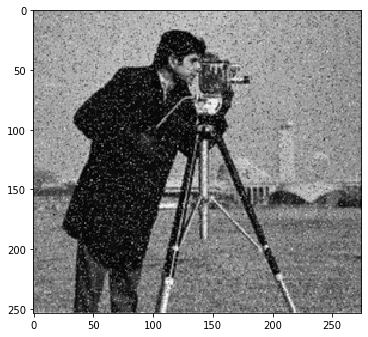

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im_1=mpimg.imread('cameraman.jpg')
im_2=convert_rgb_to_gray_level(im_1)
#im_3=convert_gray_level_to_BW(im_1)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_1)
#plt.subplot(1,3,2),plt.imshow(im_2,cmap='gray')
#plt.subplot(1,3,3),plt.imshow(im_3,cmap='gray')

In [54]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

def get_median_for_55(poi):
    s_1=poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]
def get_median(poi):
    s_1=poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]
def get_mean_filter_for_55(im_1):
    #im_1=plt.imread('')
    
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=im_1[i-2:i+3,j-2:j+3]
            #im_2[i,j]=apply_mask(poi)
            im_2[i,j]=get_median_for_55(poi)
    return im_2  
def get_mean_filter(im_1):
    #im_1=plt.imread('')
    
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi=im_1[i-1:i+2,j-1:j+2]
            #im_2[i,j]=apply_mask(poi)
            im_2[i,j]=get_median(poi)
    return im_2  

In [55]:
i,j=10,10
poi_100=im_1[i-2:i+3,j-2:j+3]
poi_100.shape

(5, 5, 3)

In [56]:
i,j=10,10
poi_100=im_2[i-2:i+3,j-2:j+3]
poi_100.shape

(5, 5)

In [57]:
apply_mask(im_2[1:4,1:4])

148.55555555555554

In [58]:
im_55=get_mean_filter_for_55(im_2)

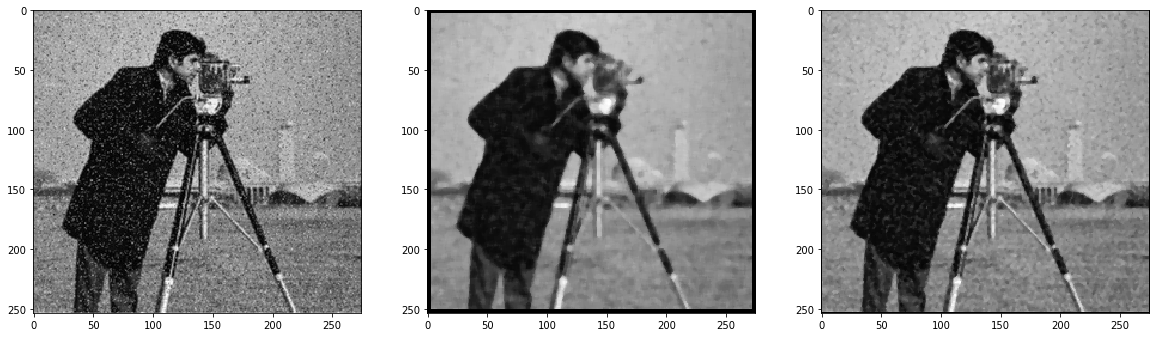

In [59]:
im_555=get_mean_filter(im_2)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_2,cmap='gray')
plt.subplot(1,3,2),plt.imshow(im_55,cmap='gray')
plt.subplot(1,3,3),plt.imshow(im_555,cmap='gray')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x1e5adeda4c8>,
 <matplotlib.image.AxesImage at 0x1e5adf60708>)

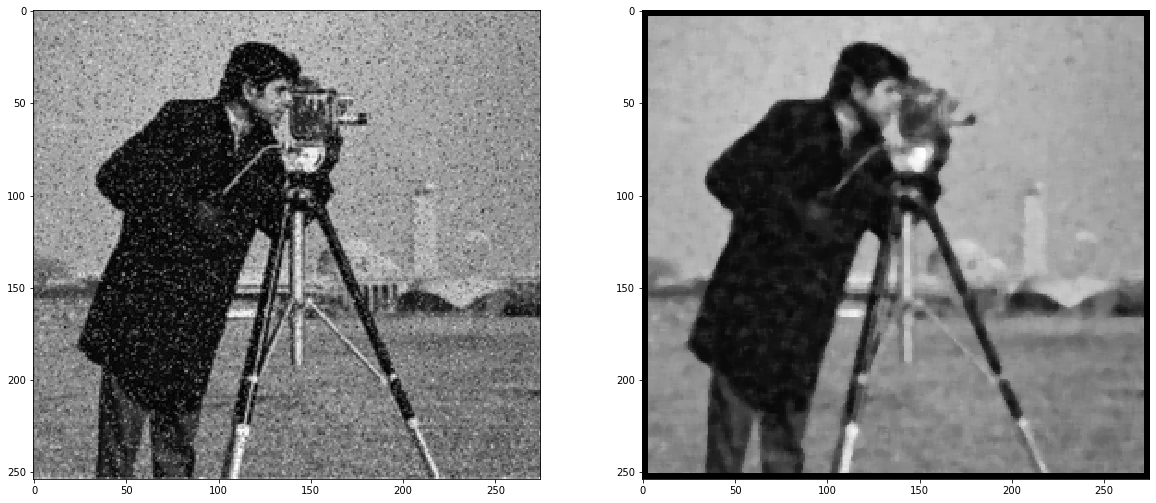

In [60]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(im_2,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_55,cmap='gray')


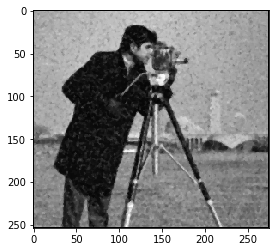

In [61]:
im_55=get_mean_filter(im_2)
plt.imshow(im_55,cmap='gray')